## Tests for CFU counting

In [68]:
from skimage.io import imshow
from importlib import reload
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../functions/')
import functions

Get data from 11-16-19

In [212]:
reload(functions);

In [3]:
images = functions.get_image_data('..\\data\\111519')
images.head()

,Date,Environ,CHL,-Log(Dilution),Image
0,11519,Ar,Yes,1,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."
1,11519,Ar,Yes,2,"[[[6, 6, 6], [5, 5, 5], [5, 5, 5], [4, 4, 4], ..."
2,11519,Ar,Yes,3,"[[[4, 4, 4], [5, 5, 5], [5, 5, 5], [5, 5, 5], ..."
3,11519,Ar,Yes,4,"[[[6, 6, 6], [6, 6, 6], [5, 5, 5], [5, 5, 5], ..."
4,11519,O2,Yes,1,"[[[2, 2, 2], [3, 3, 3], [3, 3, 3], [3, 3, 3], ..."


Get image of O2 conditions with CHL and dilution = 10^-2

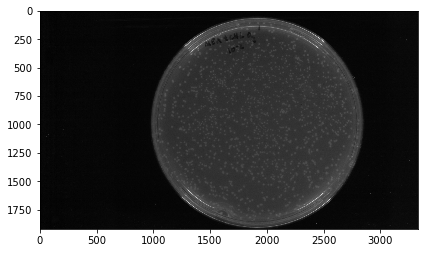

In [227]:
filter = (images['Environ'] == 'O2') & (images['CHL'] == 'Yes') & (images['-Log(Dilution)'] == '2')
im = images[filter]['Image'].item()
imshow(im,cmap='gray')
plt.show()

Now, let's find the roi.

In [228]:
edge = functions.plate_edge_detector(im)

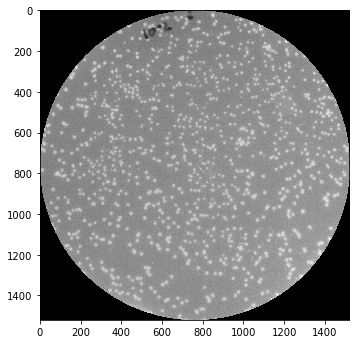

In [229]:
roi, roi_area = functions.define_circular_roi(im,edge)
plt.figure(figsize=(5,5))
imshow(roi / roi.max(),cmap = 'gray')

Finally, we can count and display the number of detected CFUs

C:\Users\Theo Yang\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Total CFUs =  933
Fractional coverage of fungi =  [0.13017287]


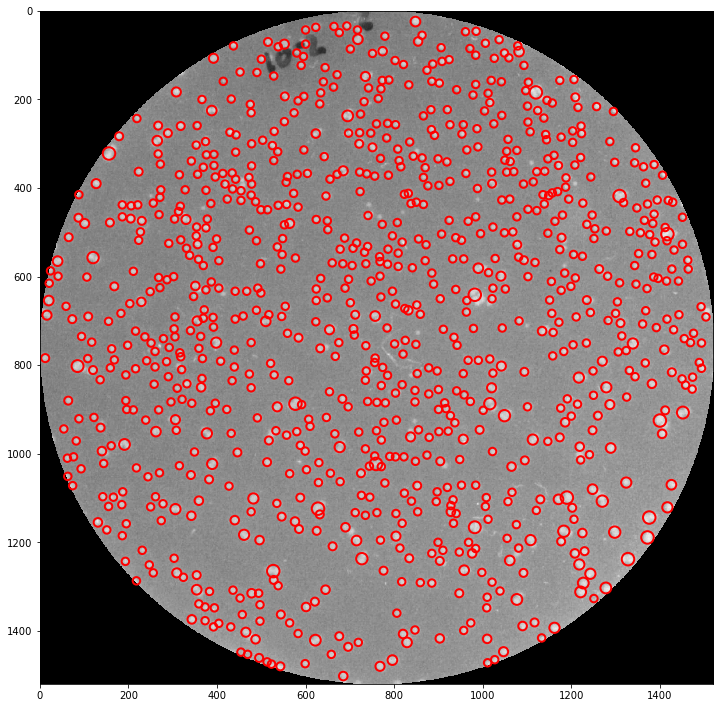

In [230]:
CFU_array = functions.CFU_count(roi)
print('Total CFUs = ', len(CFU_array[:,2]))
print('Fractional coverage of fungi = ', sum(CFU_array[:,2]) / roi_area)
functions.show_CFUs(roi / roi.max(),CFU_array)